In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
nap = pd.read_csv("NAP_category.csv")

In [3]:
nap.columns

Index(['Category', 'Advertiser Currency', 'Impressions', 'Clicks',
       'Total Conversions', 'Post-Click Conversions', 'Post-View Conversions',
       'Revenue (Adv Currency)'],
      dtype='object')

In [6]:
nap = nap.drop(["Advertiser Currency"], axis=1)

In [9]:
nap.columns = ['Category', 'Impressions', 'Clicks', 'Conversions',
       'PCConversions', 'PVConversions',
       'Spend']

In [14]:
nap = nap.drop(nap.index[1943:])

In [37]:
nap["CategorySummary"] = nap["Category"].str.split("/").str[1]

In [38]:
nap.head()

,Category,Impressions,Clicks,Conversions,PCConversions,PVConversions,Spend,CategorySummary
0,/Arts & Entertainment/TV & Video/TV Shows & Pr...,4289.0,0.0,1.0,0.0,1.0,27.004091,Arts & Entertainment
1,/Autos & Vehicles/Vehicle Brands/Land Rover,229.0,0.0,1.0,0.0,1.0,1.564716,Autos & Vehicles
2,/Finance/Credit & Lending/Credit Cards,998.0,1.0,0.0,0.0,0.0,7.519177,Finance
3,/Real Estate/Commercial & Investment Real Estate,342.0,0.0,0.0,0.0,0.0,2.816406,Real Estate
4,/Science/Biological Sciences,4857.0,5.0,4.0,0.0,4.0,41.511666,Science


In [40]:
nap_p = nap.pivot_table(index="CategorySummary", values=["Impressions", "Clicks", "Conversions", "Spend"])

In [41]:
nap_p["CPA"] = nap_p.Spend / nap_p.Conversions

In [47]:
nap_p

,Clicks,Conversions,Impressions,Spend,CPA
CategorySummary,,,,,
Arts & Entertainment,11.529801,9.072848,10511.768212,85.202635,9.390947
Autos & Vehicles,0.380435,0.228261,422.554348,3.075815,13.474998
Beauty & Fitness,26.230769,51.615385,27462.384615,259.850441,5.034360
Books & Literature,16.888889,17.333333,10202.777778,98.171601,5.663746
Business & Industrial,2.016667,1.325000,2157.041667,16.959929,12.799946
Computers & Electronics,0.637097,0.193548,561.822581,4.228214,21.845770
Finance,4.226415,2.320755,5501.245283,37.850326,16.309490
Food & Drink,6.821918,7.082192,7091.561644,55.811618,7.880557
Games,1.023810,0.071429,874.785714,5.959477,83.432681


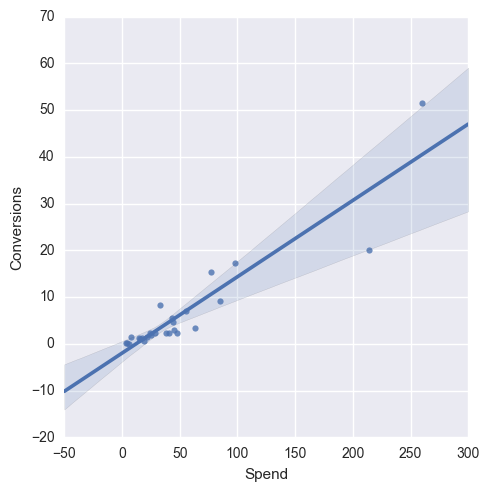

In [45]:
sns.lmplot(data=nap_p, x="Spend", y="Conversions")